# Feed Forward

In [35]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [36]:
# hyper parameters
input_size = 784  # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


In [37]:
# MNIST
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)

samples, labels  = next(iter(train_loader))
print(samples.shape, labels.shape)


torch.Size([100, 1, 28, 28]) torch.Size([100])


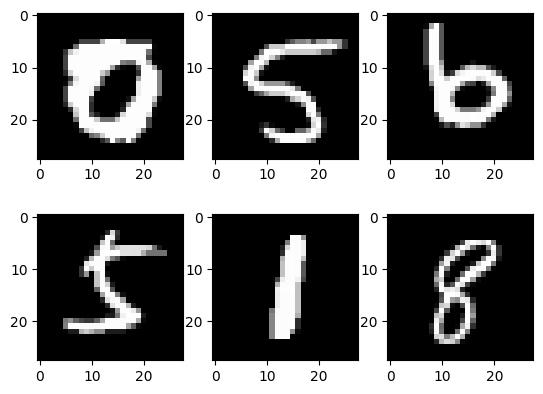

In [38]:
# Analyzing the data
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [39]:
# Neural networks class
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # multiclass -> so no softmax method
        return out


model = NeuralNet(input_size, hidden_size, num_classes)


In [40]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [41]:
# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28 -> 100, 784
        images = images.reshape(-1, 28*28)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(
                f'epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


epoch 1/ 2, step 100/600, loss = 0.4294
epoch 1/ 2, step 200/600, loss = 0.1799
epoch 1/ 2, step 300/600, loss = 0.2208
epoch 1/ 2, step 400/600, loss = 0.2656
epoch 1/ 2, step 500/600, loss = 0.2145
epoch 1/ 2, step 600/600, loss = 0.2024
epoch 2/ 2, step 100/600, loss = 0.2267
epoch 2/ 2, step 200/600, loss = 0.1100
epoch 2/ 2, step 300/600, loss = 0.1281
epoch 2/ 2, step 400/600, loss = 0.1258
epoch 2/ 2, step 500/600, loss = 0.1701
epoch 2/ 2, step 600/600, loss = 0.2328


In [42]:
# testing
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()

    acc = 100 * n_correct / n_samples
    print(f'Accuracy = {acc}')


Accuracy = 0.94
